<a href="https://colab.research.google.com/github/vidhyagowda-232/Microsoft-Research-Paraphrase-Corpus/blob/main/MRPC_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Project

Title: Microsoft Research Paraphrase Detection

Author: Vidhya Shree H

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
import csv

with open("/content/msr_paraphrase_train.txt", 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')
    train_data = pd.DataFrame(reader)

with open("/content/msr_paraphrase_test.txt", 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')
    test_data = pd.DataFrame(reader)

In [ ]:
train_data.head()

,0,1,2,3,4,5
0,﻿Quality,#1 ID,#2 ID,#1 String,#2 String,None
1,1,702876,702977,"Amrozi accused his brother, whom he called ""th...","Referring to him as only ""the witness"", Amrozi...",None
2,0,2108705,2108831,Yucaipa owned Dominick's before selling the ch...,Yucaipa bought Dominick's in 1995 for $693 mil...,None
3,1,1330381,1330521,They had published an advertisement on the Int...,"On June 10, the ship's owners had published an...",None
4,0,3344667,3344648,"Around 0335 GMT, Tab shares were up 19 cents, ...","Tab shares jumped 20 cents, or 4.6%, to set a ...",None


In [ ]:
test_data.head()

,0,1,2,3,4,5
0,﻿Quality,#1 ID,#2 ID,#1 String,#2 String,None
1,1,1089874,1089925,"PCCW's chief operating officer, Mike Butcher, ...",Current Chief Operating Officer Mike Butcher a...,None
2,1,3019446,3019327,The world's two largest automakers said their ...,Domestic sales at both GM and No. 2 Ford Motor...,None
3,1,1945605,1945824,According to the federal Centers for Disease C...,The Centers for Disease Control and Prevention...,None
4,0,1430402,1430329,A tropical storm rapidly developed in the Gulf...,A tropical storm rapidly developed in the Gulf...,None


In [ ]:
train_data.tail(5)

,0,1,2,3,4,5
3958,1,1620264,1620507,"At this point, Mr. Brando announced: 'Somebody...","Brando said that ""somebody ought to put a bull...",None
3959,0,1848001,1848224,"Martin, 58, will be freed today after serving ...",Martin served two thirds of a five-year senten...,None
3960,1,747160,747144,We have concluded that the outlook for price s...,"In a statement, the ECB said the outlook for p...",None
3961,1,2539933,2539850,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...,None
3962,0,453575,453448,The 30-year bond US30YT=RR rose 22/32 for a yi...,The 30-year bond US30YT=RR grew 1-3/32 for a y...,None


In [ ]:
test_data.tail(5)

,0,1,2,3,4,5
1646,0,2685984,2686122,"After Hughes refused to rehire Hernandez, he c...",Hernandez filed an Equal Employment Opportunit...,None
1647,0,339215,339172,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...,None
1648,0,2996850,2996734,Bethany Hamilton remained in stable condition ...,"Bethany, who remained in stable condition afte...",None
1649,1,2095781,2095812,"Last week the power station’s US owners, AES C...","The news comes after Drax's American owner, AE...",None
1650,1,2136244,2136052,Sobig.F spreads when unsuspecting computer use...,The virus spreads when unsuspecting computer u...,None


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3963 non-null   object
 1   1       3963 non-null   object
 2   2       3963 non-null   object
 3   3       3963 non-null   object
 4   4       3942 non-null   object
 5   5       24 non-null     object
dtypes: object(6)
memory usage: 185.9+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1651 non-null   object
 1   1       1651 non-null   object
 2   2       1651 non-null   object
 3   3       1651 non-null   object
 4   4       1642 non-null   object
 5   5       11 non-null     object
dtypes: object(6)
memory usage: 77.5+ KB


In [ ]:
train_data.describe

<bound method NDFrame.describe of              0        1        2  \
0     ﻿Quality    #1 ID    #2 ID   
1            1   702876   702977   
2            0  2108705  2108831   
3            1  1330381  1330521   
4            0  3344667  3344648   
...        ...      ...      ...   
3958         1  1620264  1620507   
3959         0  1848001  1848224   
3960         1   747160   747144   
3961         1  2539933  2539850   
3962         0   453575   453448   

                                                      3  \
0                                             #1 String   
1     Amrozi accused his brother, whom he called "th...   
2     Yucaipa owned Dominick's before selling the ch...   
3     They had published an advertisement on the Int...   
4     Around 0335 GMT, Tab shares were up 19 cents, ...   
...                                                 ...   
3958  At this point, Mr. Brando announced: 'Somebody...   
3959  Martin, 58, will be freed today after serving ...   
39

In [ ]:
test_data.describe

<bound method NDFrame.describe of              0        1        2  \
0     ﻿Quality    #1 ID    #2 ID   
1            1  1089874  1089925   
2            1  3019446  3019327   
3            1  1945605  1945824   
4            0  1430402  1430329   
...        ...      ...      ...   
1646         0  2685984  2686122   
1647         0   339215   339172   
1648         0  2996850  2996734   
1649         1  2095781  2095812   
1650         1  2136244  2136052   

                                                      3  \
0                                             #1 String   
1     PCCW's chief operating officer, Mike Butcher, ...   
2     The world's two largest automakers said their ...   
3     According to the federal Centers for Disease C...   
4     A tropical storm rapidly developed in the Gulf...   
...                                                 ...   
1646  After Hughes refused to rehire Hernandez, he c...   
1647  There are 103 Democrats in the Assembly and 47...   
16

In [ ]:
train_data.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
dtype: object

In [ ]:
test_data.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
dtype: object

In [ ]:
train_data.size

23778

In [ ]:
test_data.size

9906

In [ ]:
train_data.shape

(3963, 6)

In [ ]:
test_data.shape

(1651, 6)

In [ ]:
train_data.columns

RangeIndex(start=0, stop=6, step=1)

In [ ]:
test_data.columns

RangeIndex(start=0, stop=6, step=1)

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Preprocess the data
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

In [ ]:
def preprocess(text):
    if isinstance(text, str):
        # Tokenize the text
        tokens = word_tokenize(text.lower())

        # Remove stop words and stem the tokens
        tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

        # Join the stemmed tokens back into a string
        return ' '.join(tokens)
    else:
        return ''


In [ ]:
train_df = train_data.iloc[:, [3, 4, 0]]
train_df.columns = ['text_a', 'text_b', 'label']

test_df = test_data.iloc[:, [3, 4, 0]]
test_df.columns = ['text_a', 'text_b', 'label']

In [ ]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

train_df_copy.loc[:, 'text'] = train_df_copy['text_a'] + ' ' + train_df_copy['text_b']
test_df_copy.loc[:, 'text'] = test_df_copy['text_a'] + ' ' + test_df_copy['text_b']


In [ ]:
# Replace missing values with an empty string
train_df_copy['text'] = train_df_copy['text'].fillna('')

test_df_copy['text'] = test_df_copy['text'].fillna('')

In [ ]:
print(train_df['text_a'].isnull().sum())
print(train_df['text_a'].isnull().sum())

0
0


In [ ]:
train_df['text_a'] = train_df['text_a'].apply(preprocess)
train_df['text_b'] = train_df['text_b'].apply(preprocess)
test_df['text_a'] = test_df['text_a'].apply(preprocess)
test_df['text_b'] = test_df['text_b'].apply(preprocess)

<ipython-input-26-eb4cbb029e56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text_a'] = train_df['text_a'].apply(preprocess)
<ipython-input-26-eb4cbb029e56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text_b'] = train_df['text_b'].apply(preprocess)
<ipython-input-26-eb4cbb029e56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Combine the preprocessed text_a and text_b into a single list
preprocessed_texts = train_df['text_a'].tolist() + train_df['text_b'].tolist()

# Fit and transform the preprocessed texts
bag_of_words = vectorizer.fit_transform(preprocessed_texts)

# The bag-of-words matrix
print(bag_of_words.toarray())

# The feature names (corresponding to each column in the matrix)
#print(vectorizer.get_feature_names())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


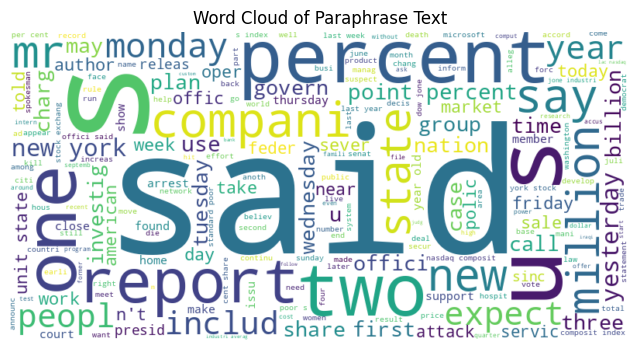

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the preprocessed text from both text_a and text_b columns
combined_text = ' '.join(train_df['text_a']) + ' ' + ' '.join(train_df['text_b'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paraphrase Text')
plt.show()

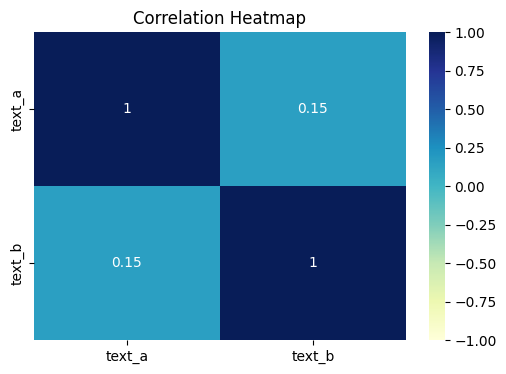

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = train_df[['text_a', 'text_b']].apply(lambda x: x.str.len())
correlation_matrix = correlation_matrix.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the training data
train_vectors = vectorizer.fit_transform(train_df_copy['text'])

# Transform the test data
test_vectors = vectorizer.transform(test_df_copy['text'])

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_vectors, train_df_copy['label'], test_size=0.2, random_state=42)


Optimize hyperparameters

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}


In [ ]:
# Create an instance of the SVC model
svc = SVC()

# Fit the model on the training data
svc.fit(X_train, y_train)

SVC()

In [ ]:
X_train.shape

(3170, 13235)

In [ ]:
X_train.shape

(3170, 13235)

In [ ]:
# Create an instance of GridSearchCV with the parameter grid and 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5,n_jobs=-1)

In [ ]:
# Fit the GridSearchCV object on the training data
grid_search.fit(train_vectors, train_df_copy['label'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [ ]:
# Print the best hyperparameters found by GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Predict on the test data using the best model
y_pred_test = grid_search.predict(test_vectors)

# Predict on the validation data using the best model found by GridSearchCV
y_pred_val = grid_search.predict(X_val)

In [ ]:
# Calculate the accuracy score of the model on the validation data
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation accuracy score after fine-tuning: {accuracy_val}")

# Predict on the test data using the best model found by GridSearchCV
y_pred_test = grid_search.predict(test_vectors)

Validation accuracy score after fine-tuning: 0.9508196721311475


In [ ]:
# Calculate the accuracy score of the model on the test data
accuracy_test = accuracy_score(test_df_copy['label'], y_pred_test)
print(f"Test accuracy score after fine-tuning: {accuracy_test}")

Test accuracy score after fine-tuning: 0.7007874015748031


In [ ]:
# Print the classification report of the model on the test data
print(classification_report(test_df_copy['label'], y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.18      0.28       552
           1       0.70      0.97      0.81      1098
    ﻿Quality       0.00      0.00      0.00         1

    accuracy                           0.70      1651
   macro avg       0.47      0.38      0.36      1651
weighted avg       0.71      0.70      0.63      1651



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ensemble Model

In [ ]:
# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
# Fit the model on the training data
rf.fit(train_vectors, train_df_copy['label'])

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Predict on the test data
y_pred_test = rf.predict(test_vectors)

In [ ]:
# Train an SVM model
svm = SVC(C=10, gamma=1, kernel='rbf')
svm.fit(train_vectors, train_df_copy['label'])

SVC(C=10, gamma=1)

In [ ]:
# Train a Naive Bayes model
nb = MultinomialNB(alpha=0.1)
nb.fit(train_vectors, train_df_copy['label'])

MultinomialNB(alpha=0.1)

In [ ]:
# Combine the predictions of the three models using majority voting
svm_preds = svm.predict(test_vectors)
nb_preds = nb.predict(test_vectors)
rf_preds = rf.predict(test_vectors)

ensemble_preds = []
for i in range(len(test_df_copy)):
    if svm_preds[i] == nb_preds[i]:
        ensemble_preds.append(svm_preds[i])
    else:
        ensemble_preds.append(rf_preds[i])

In [ ]:
# Calculate the accuracy score of the ensemble model on the test data
accuracy_test = accuracy_score(test_df_copy['label'], ensemble_preds)
print(f"Test accuracy score: {accuracy_test}")

# Print the classification report of the ensemble model on the test data
print(classification_report(test_df_copy['label'], ensemble_preds))


Test accuracy score: 0.6977589339794065
              precision    recall  f1-score   support

           0       0.64      0.22      0.33       552
           1       0.71      0.94      0.80      1098
    ﻿Quality       0.00      0.00      0.00         1

    accuracy                           0.70      1651
   macro avg       0.45      0.39      0.38      1651
weighted avg       0.68      0.70      0.65      1651



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate the accuracy score of the model on the validation data
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation accuracy score of Ensemble Models: {accuracy_val}")

Validation accuracy score of Ensemble Models: 0.9508196721311475


INDIVIDUAL MODELS


SVM Model

In [ ]:
# Predict on the validation data
y_pred_val = svc.predict(X_val)


In [ ]:
# Calculate the accuracy score of the model on the validation data
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation accuracy score: {accuracy_val}")

Validation accuracy score: 0.7326607818411097


In [ ]:
# Predict on the test data
y_pred_test = svc.predict(test_vectors)

In [ ]:
# Calculate the accuracy score of the model on the test data
accuracy_test = accuracy_score(test_df_copy['label'], y_pred_test)
print(f"Test accuracy score: {accuracy_test}")

Test accuracy score: 0.6995760145366444


In [ ]:
# Print the classification report of the model on the test data
print(classification_report(test_df_copy['label'], y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.17      0.28       552
           1       0.70      0.96      0.81      1098
    ﻿Quality       0.00      0.00      0.00         1

    accuracy                           0.70      1651
   macro avg       0.47      0.38      0.36      1651
weighted avg       0.70      0.70      0.63      1651



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict on the validation data
y_pred_val = dt.predict(X_val)

In [ ]:
# Calculate the accuracy score of the model on the validation data
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation accuracy score: {accuracy_val}")

Validation accuracy score: 0.6557377049180327


In [ ]:
# Predict on the test data
y_pred_test = dt.predict(test_vectors)

# Calculate the accuracy score of the model on the test data
accuracy_test = accuracy_score(test_df_copy['label'], y_pred_test)
print(f"Test accuracy score: {accuracy_test}")

Test accuracy score: 0.6256814052089643


In [ ]:
# Print the classification report of the model on the test data
print(classification_report(test_df_copy['label'], y_pred_test))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       552
           1       0.71      0.74      0.72      1098
    ﻿Quality       1.00      1.00      1.00         1

    accuracy                           0.63      1651
   macro avg       0.72      0.71      0.71      1651
weighted avg       0.62      0.63      0.62      1651



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the validation data
y_pred_val = lr.predict(X_val)

# Calculate the accuracy score of the model on the validation data
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation accuracy score: {accuracy_val}")

Validation accuracy score: 0.7175283732660782


In [ ]:
# Predict on the test data
y_pred_test = lr.predict(test_vectors)

# Calculate the accuracy score of the model on the test data
accuracy_test = accuracy_score(test_df_copy['label'], y_pred_test)
print(f"Test accuracy score: {accuracy_test}")

Test accuracy score: 0.6898849182313749


In [ ]:
# Print the classification report of the model on the test data
print(classification_report(test_df_copy['label'], y_pred_test))

              precision    recall  f1-score   support

           0       0.61      0.21      0.31       552
           1       0.70      0.93      0.80      1098
    ﻿Quality       0.00      0.00      0.00         1

    accuracy                           0.69      1651
   macro avg       0.44      0.38      0.37      1651
weighted avg       0.67      0.69      0.64      1651



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


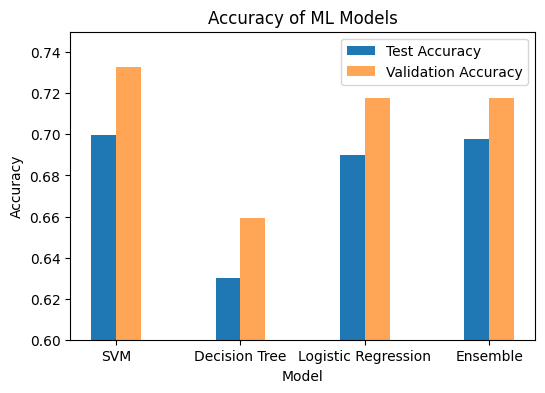

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
model_names = ['SVM', 'Decision Tree', 'Logistic Regression', 'Ensemble']
accuracy_test = [0.6995760145366444, 0.6299212598425197, 0.6898849182313749, 0.6977589339794065]
accuracy_val = [0.7326607818411097, 0.6595208070617906, 0.7175283732660782, 0.7175283732660782]

# Set the width of the bars
bar_width = 0.2

# Set the x positions of the bars
x_train = np.arange(len(model_names))
x_val = x_train + bar_width

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(x_train, accuracy_test, width=bar_width, label='Test Accuracy')
plt.bar(x_val, accuracy_val, width=bar_width, alpha=0.7, label='Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of ML Models')
plt.ylim(0.6, 0.75)  # Set the y-axis limits
plt.xticks(x_train + bar_width/2, model_names)
plt.legend()
plt.show()


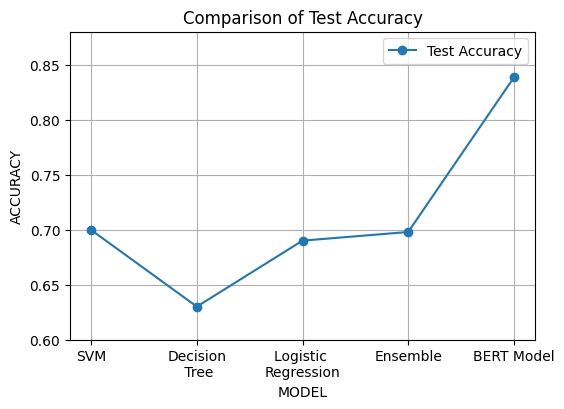

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
model_names = ['SVM', 'Decision\n Tree', 'Logistic \nRegression', 'Ensemble', 'BERT Model']
accuracy_test = [0.6995760145366444, 0.6299212598425197, 0.6898849182313749, 0.6977589339794065, 0.8382608695652174]

# Set the x positions of the data points
x_train = np.arange(len(model_names))

# Create a line plot
plt.figure(figsize=(6, 4))
plt.plot(x_train, accuracy_test, marker='o', linestyle='-', label='Test Accuracy')

plt.xlabel('MODEL')
plt.ylabel('ACCURACY')
plt.title('Comparison of Test Accuracy')
plt.ylim(0.6, 0.88)  # Set the y-axis limits
plt.xticks(x_train, model_names)  # Set the x-axis labels
plt.legend()
plt.grid(True)  # Add a grid
plt.show()


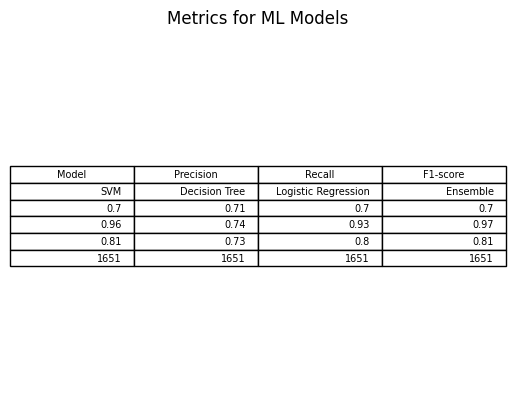

In [ ]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding precision, recall, f1-score, and support values
model_names = ['SVM', 'Decision Tree', 'Logistic Regression', 'Ensemble']
precision = [0.70, 0.71, 0.70, 0.70]
recall = [0.96, 0.74, 0.93, 0.97]
f1_score = [0.81, 0.73, 0.80, 0.81]
support = [1651, 1651, 1651, 1651]

# Create a table to display the metrics
data = [precision, recall, f1_score, support]
columns = ['Model', 'Precision', 'Recall', 'F1-score', 'Support']
cell_text = [model_names] + data
plt.table(cellText=cell_text, colLabels=columns, loc='center')

# Hide axis
plt.axis('off')

# Set the title
plt.title('Metrics for ML Models')

# Show the plot
plt.show()


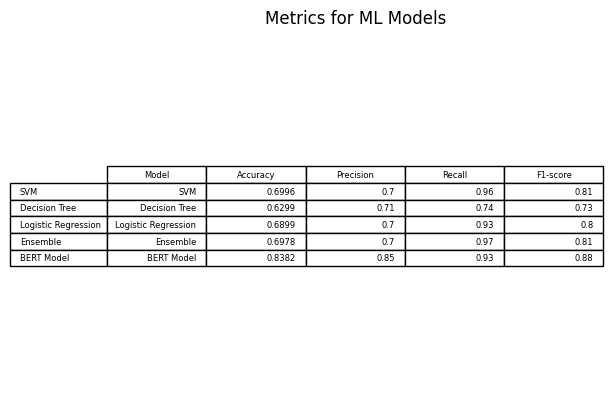

In [ ]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracy, precision, recall, and F1-score values
model_names = ['SVM', 'Decision Tree', 'Logistic Regression', 'Ensemble','BERT Model']
accuracy = [0.6996, 0.6299, 0.6899, 0.6978, 0.8382]
precision = [0.70, 0.71, 0.70, 0.70,0.85]
recall = [0.96, 0.74, 0.93, 0.97,0.93]
f1_score = [0.81, 0.73, 0.80, 0.81,0.88]

# Create a table to display the metrics
data = [model_names, accuracy, precision, recall, f1_score]
rows = ['Model','Accuracy', 'Precision', 'Recall', 'F1-score']
cell_text = list(zip(*data))
plt.table(cellText=cell_text, rowLabels=model_names, colLabels=rows, loc='center')

# Hide axis
plt.axis('off')

# Set the title
plt.title('Metrics for ML Models')

# Show the plot
plt.show()